In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [ ]:
BTC_USD = yf.download("BTC-USD",start="2023-01-01",end="2023-06-01",interval='1d')
BTC_USD.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


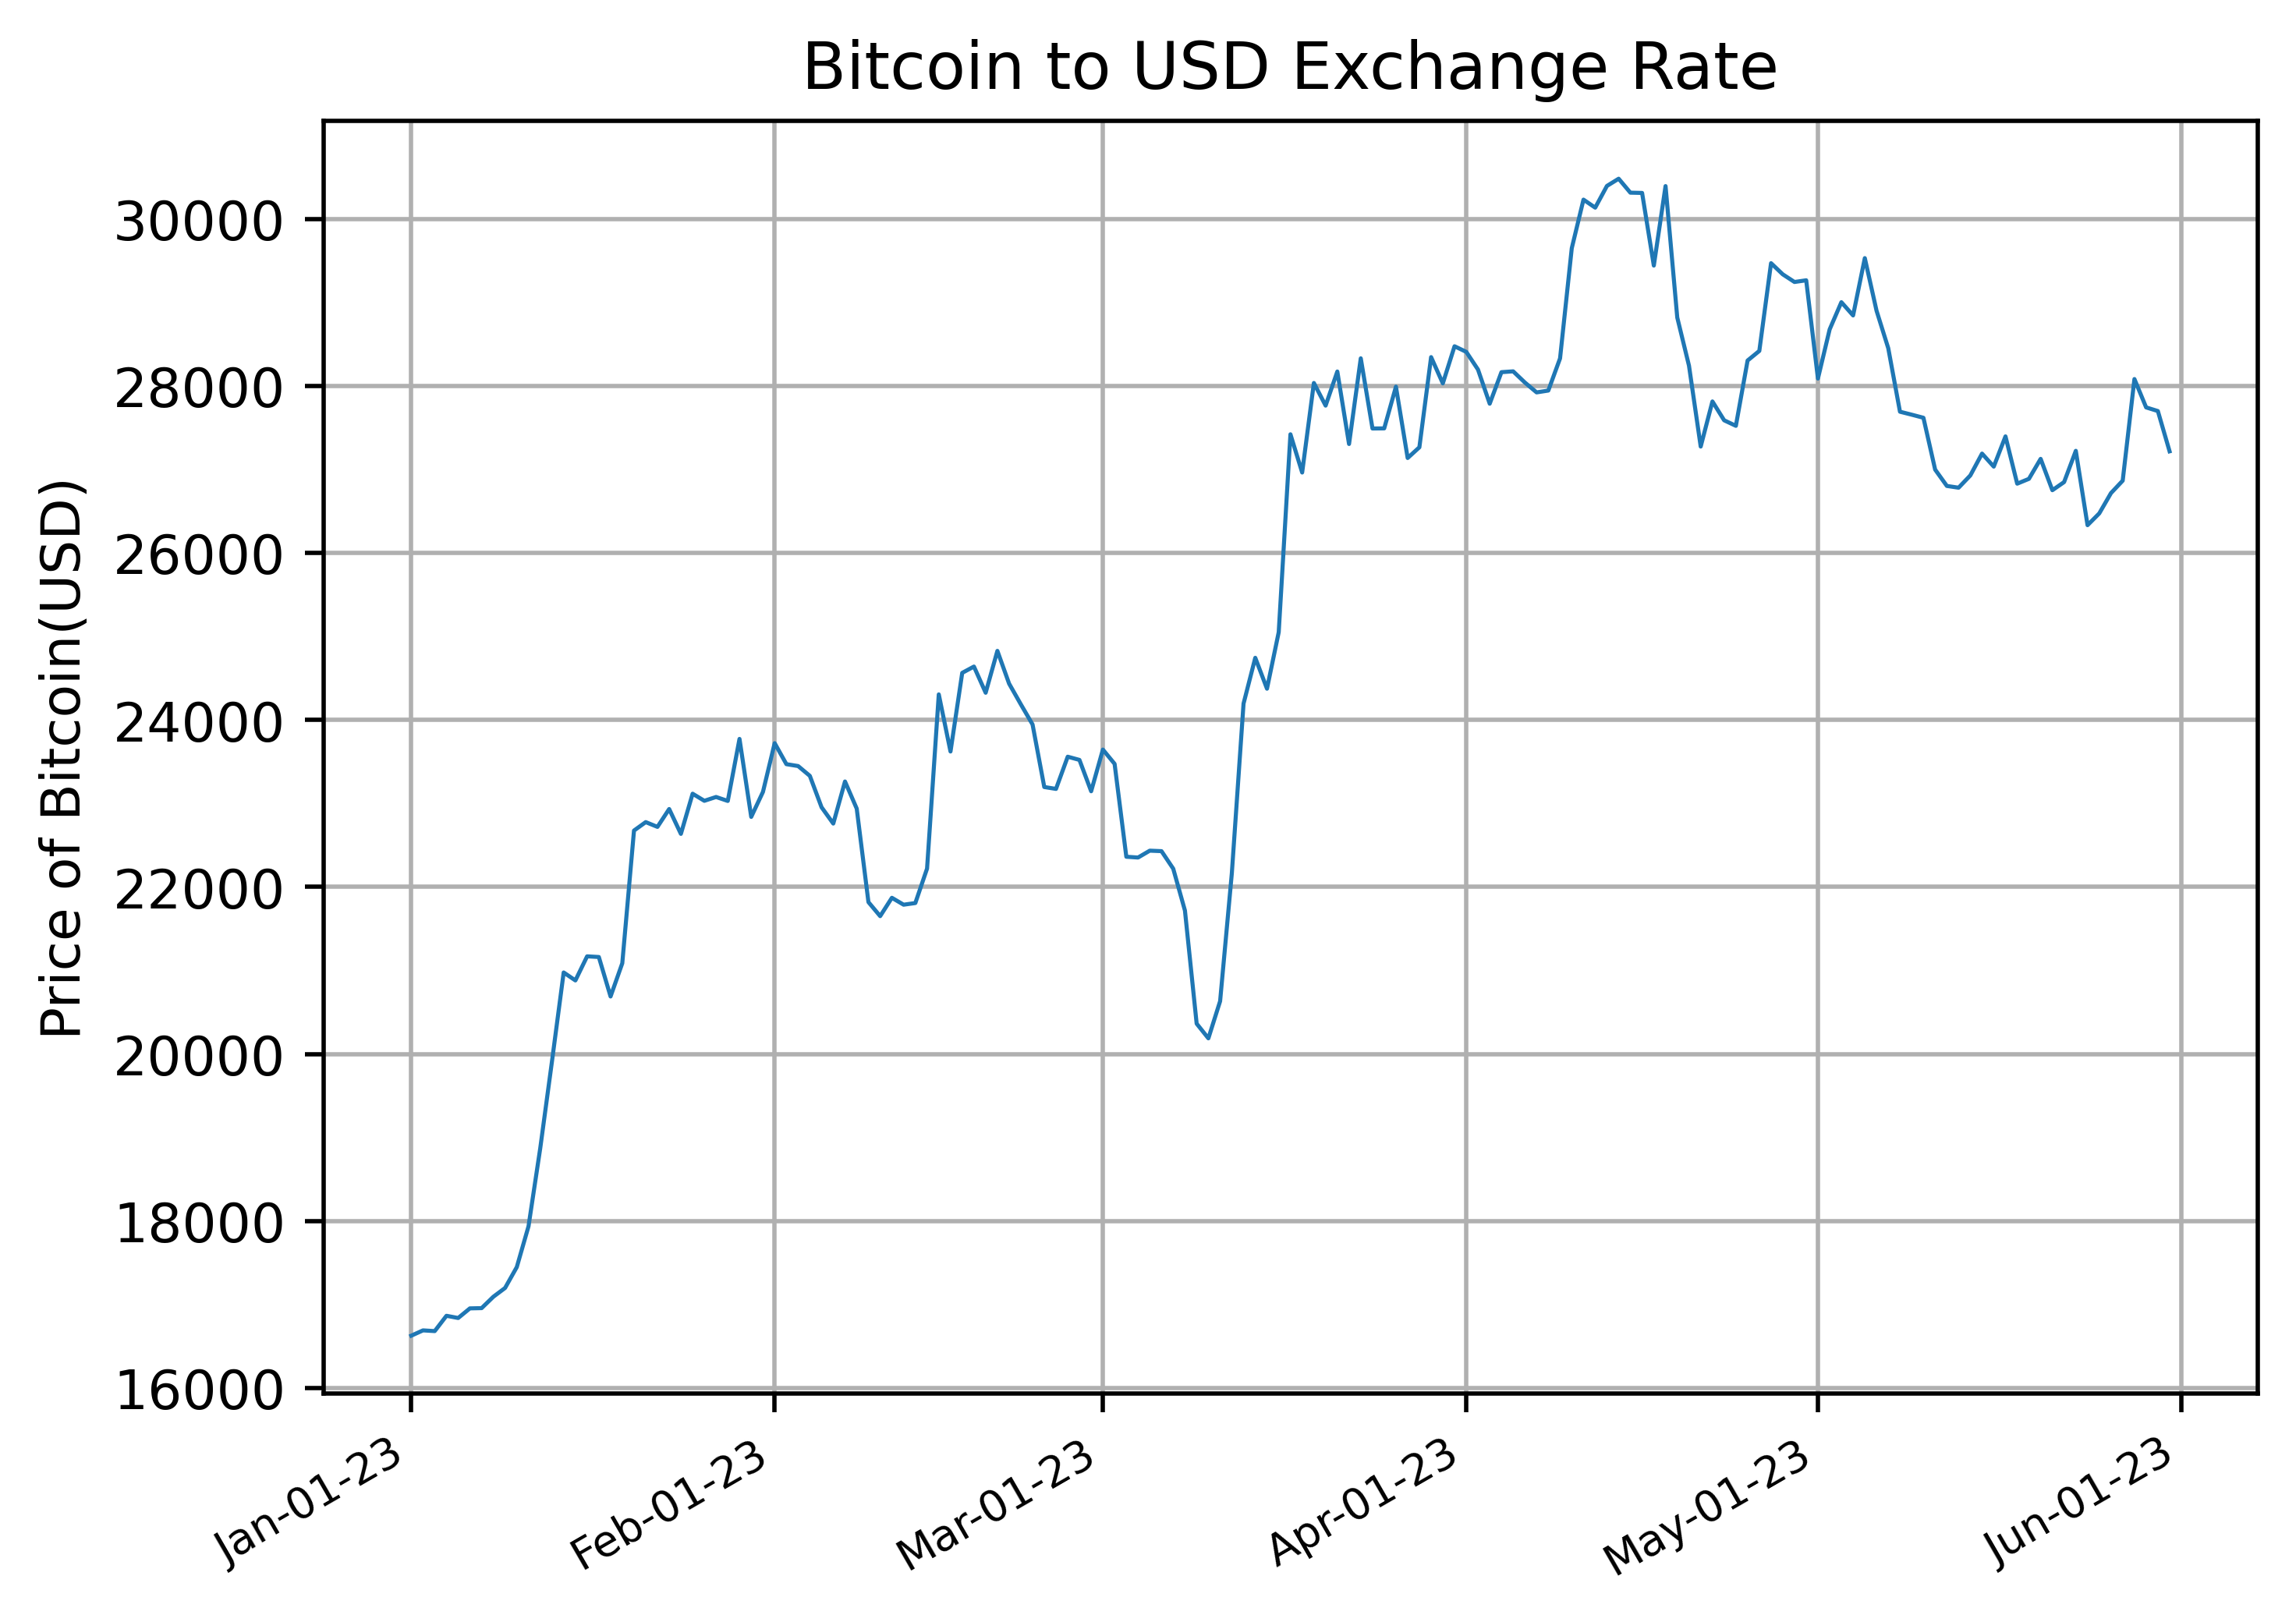

In [ ]:
fig, ax = plt.subplots(dpi=200)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(BTC_USD['Close'], lw=0.75)

ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()

plt.show()

In [ ]:
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2023-05-27,26720.181641,26888.882812,26621.140625,26868.353516,26868.353516,7892015141,26805.468316,27652.751302
2023-05-28,26871.158203,28193.449219,26802.751953,28085.646484,28085.646484,14545229578,26938.303602,27610.930794
2023-05-29,28075.591797,28432.039062,27563.876953,27745.884766,27745.884766,15181308984,27006.781250,27560.844010
2023-05-30,27745.123047,28044.759766,27588.501953,27702.349609,27702.349609,13251081851,27112.172743,27508.628776
2023-05-31,27700.529297,27831.677734,26866.453125,27219.658203,27219.658203,15656371534,27153.103950,27479.565104


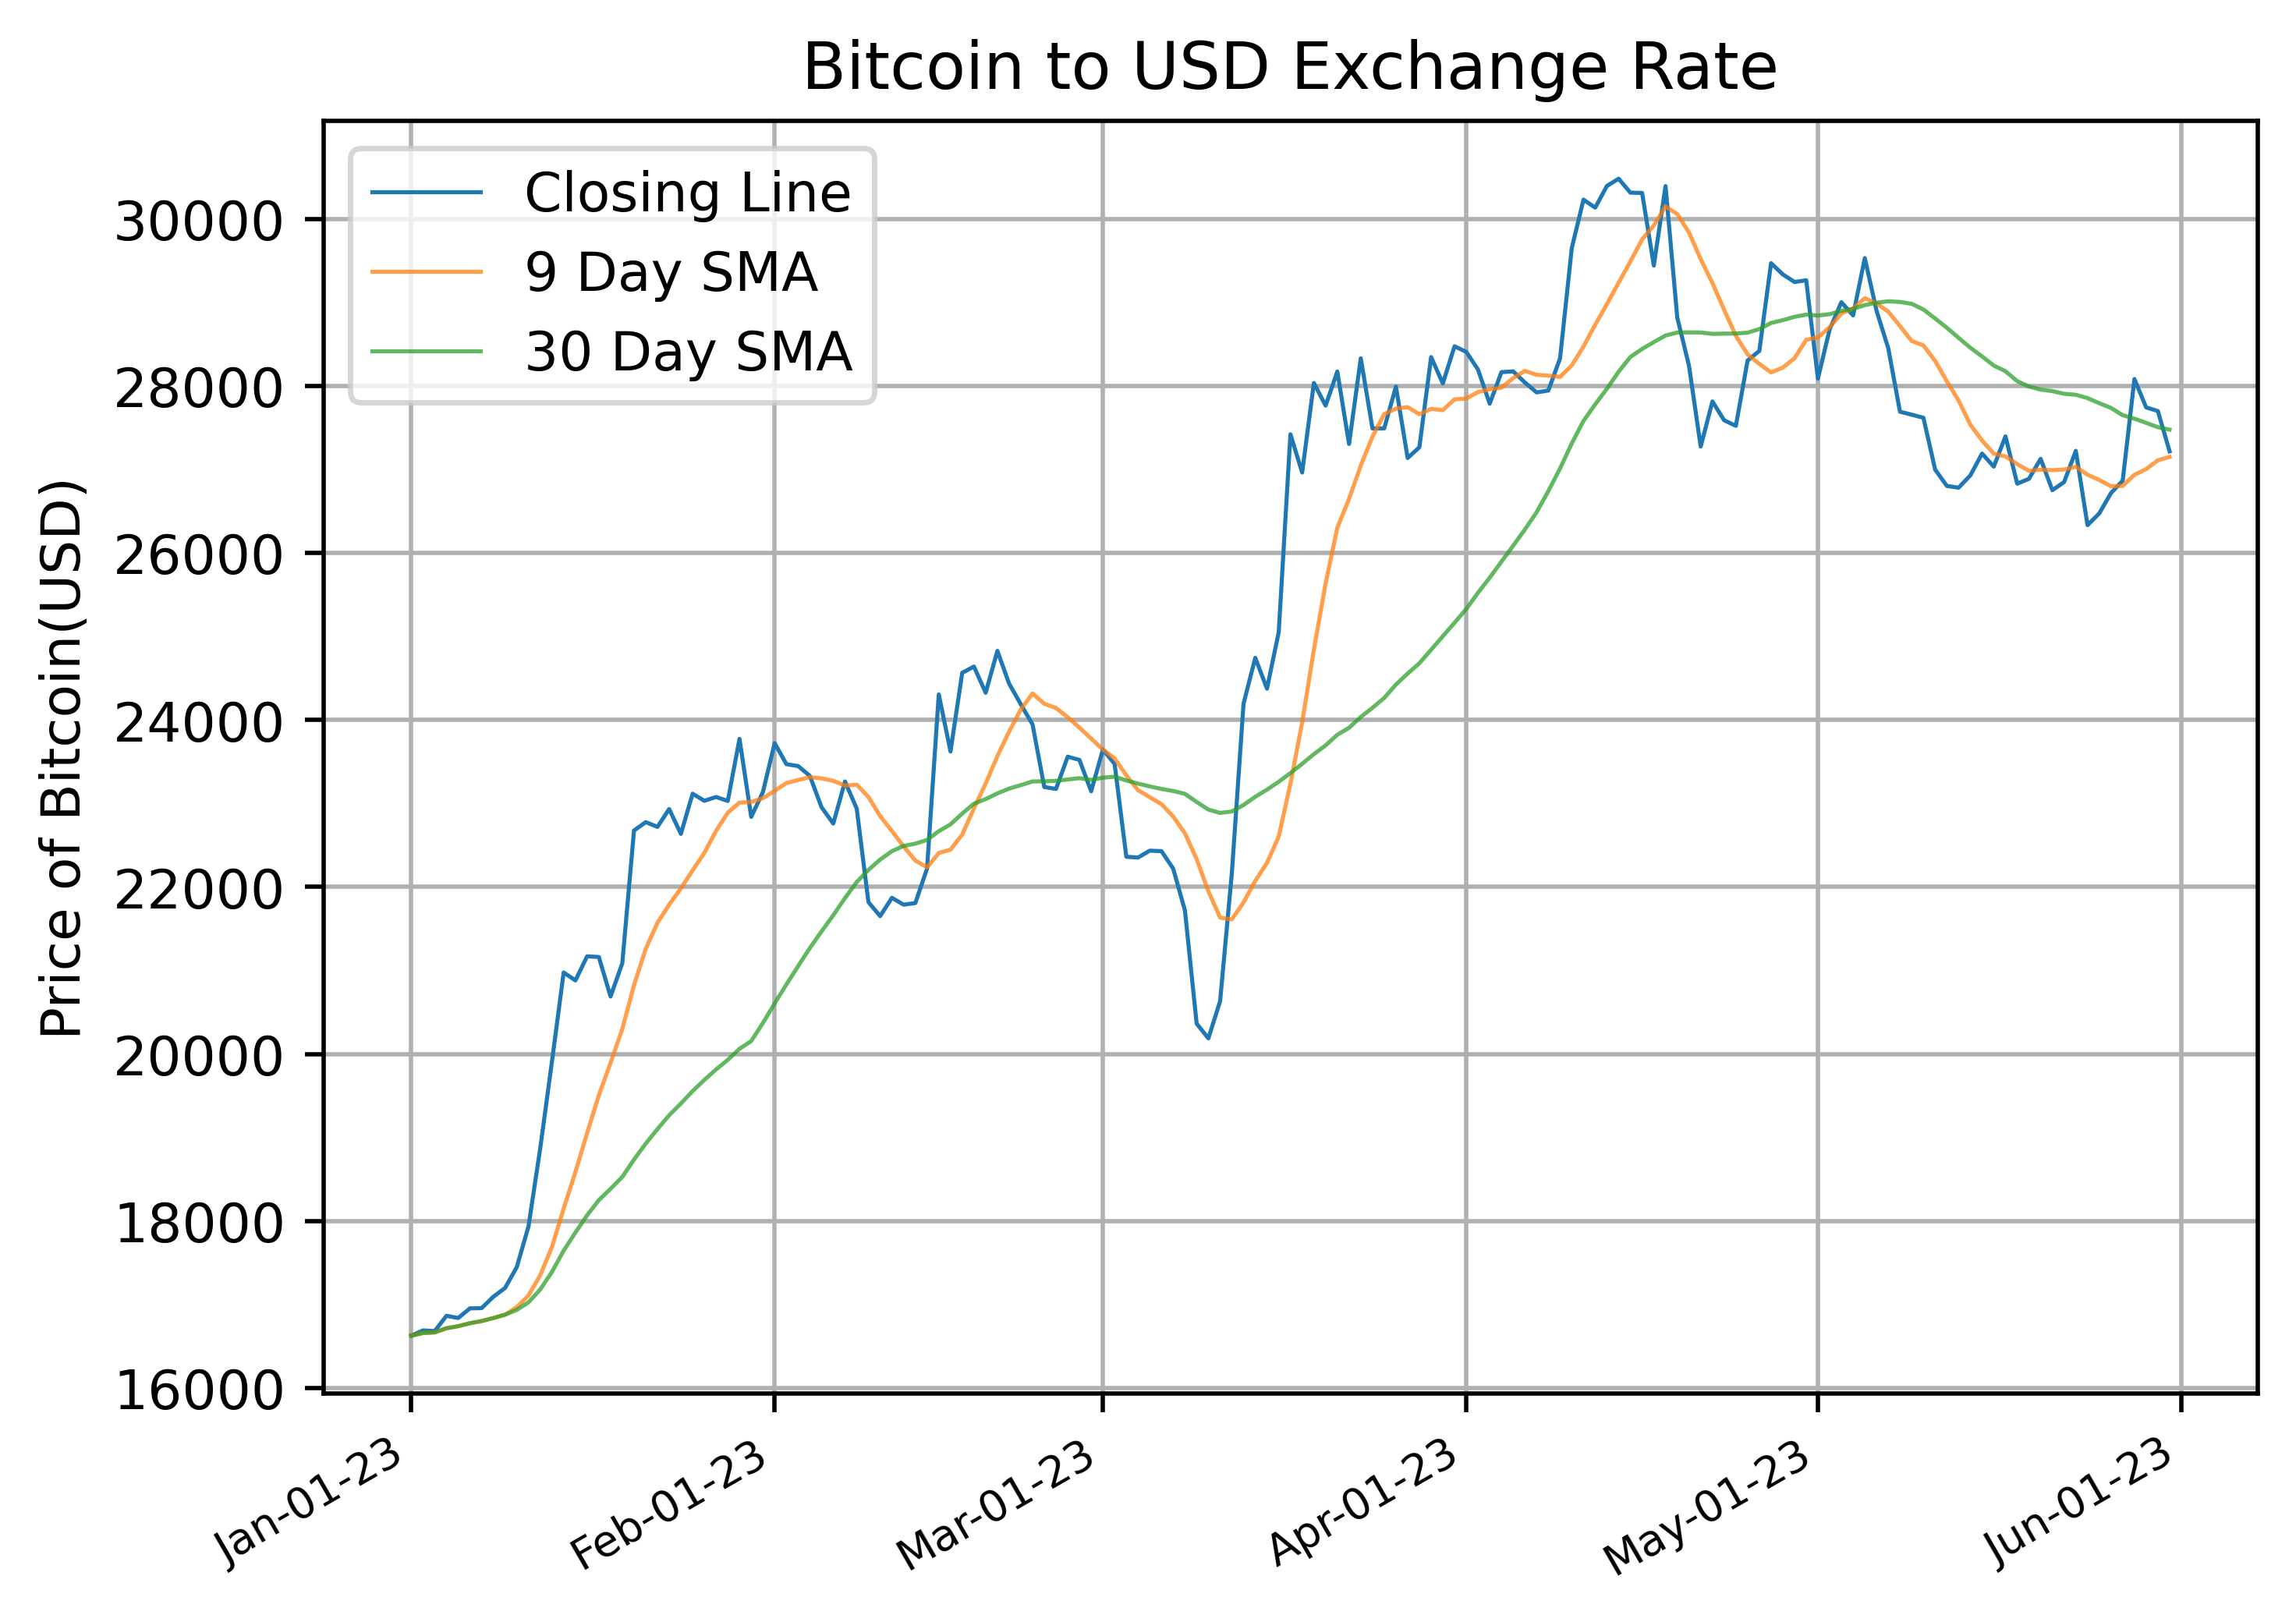

In [ ]:
fig, ax = plt.subplots(dpi=200)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Line')

ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')

ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()
ax.legend()

plt.show()

In [ ]:
trade_signals = pd.DataFrame(index=BTC_USD.index)

short_interval=10
long_interval=40

trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

In [ ]:
trade_signals['Signal'] = 0.0

trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0 )

trade_signals['Position'] = trade_signals['Signal'].diff()

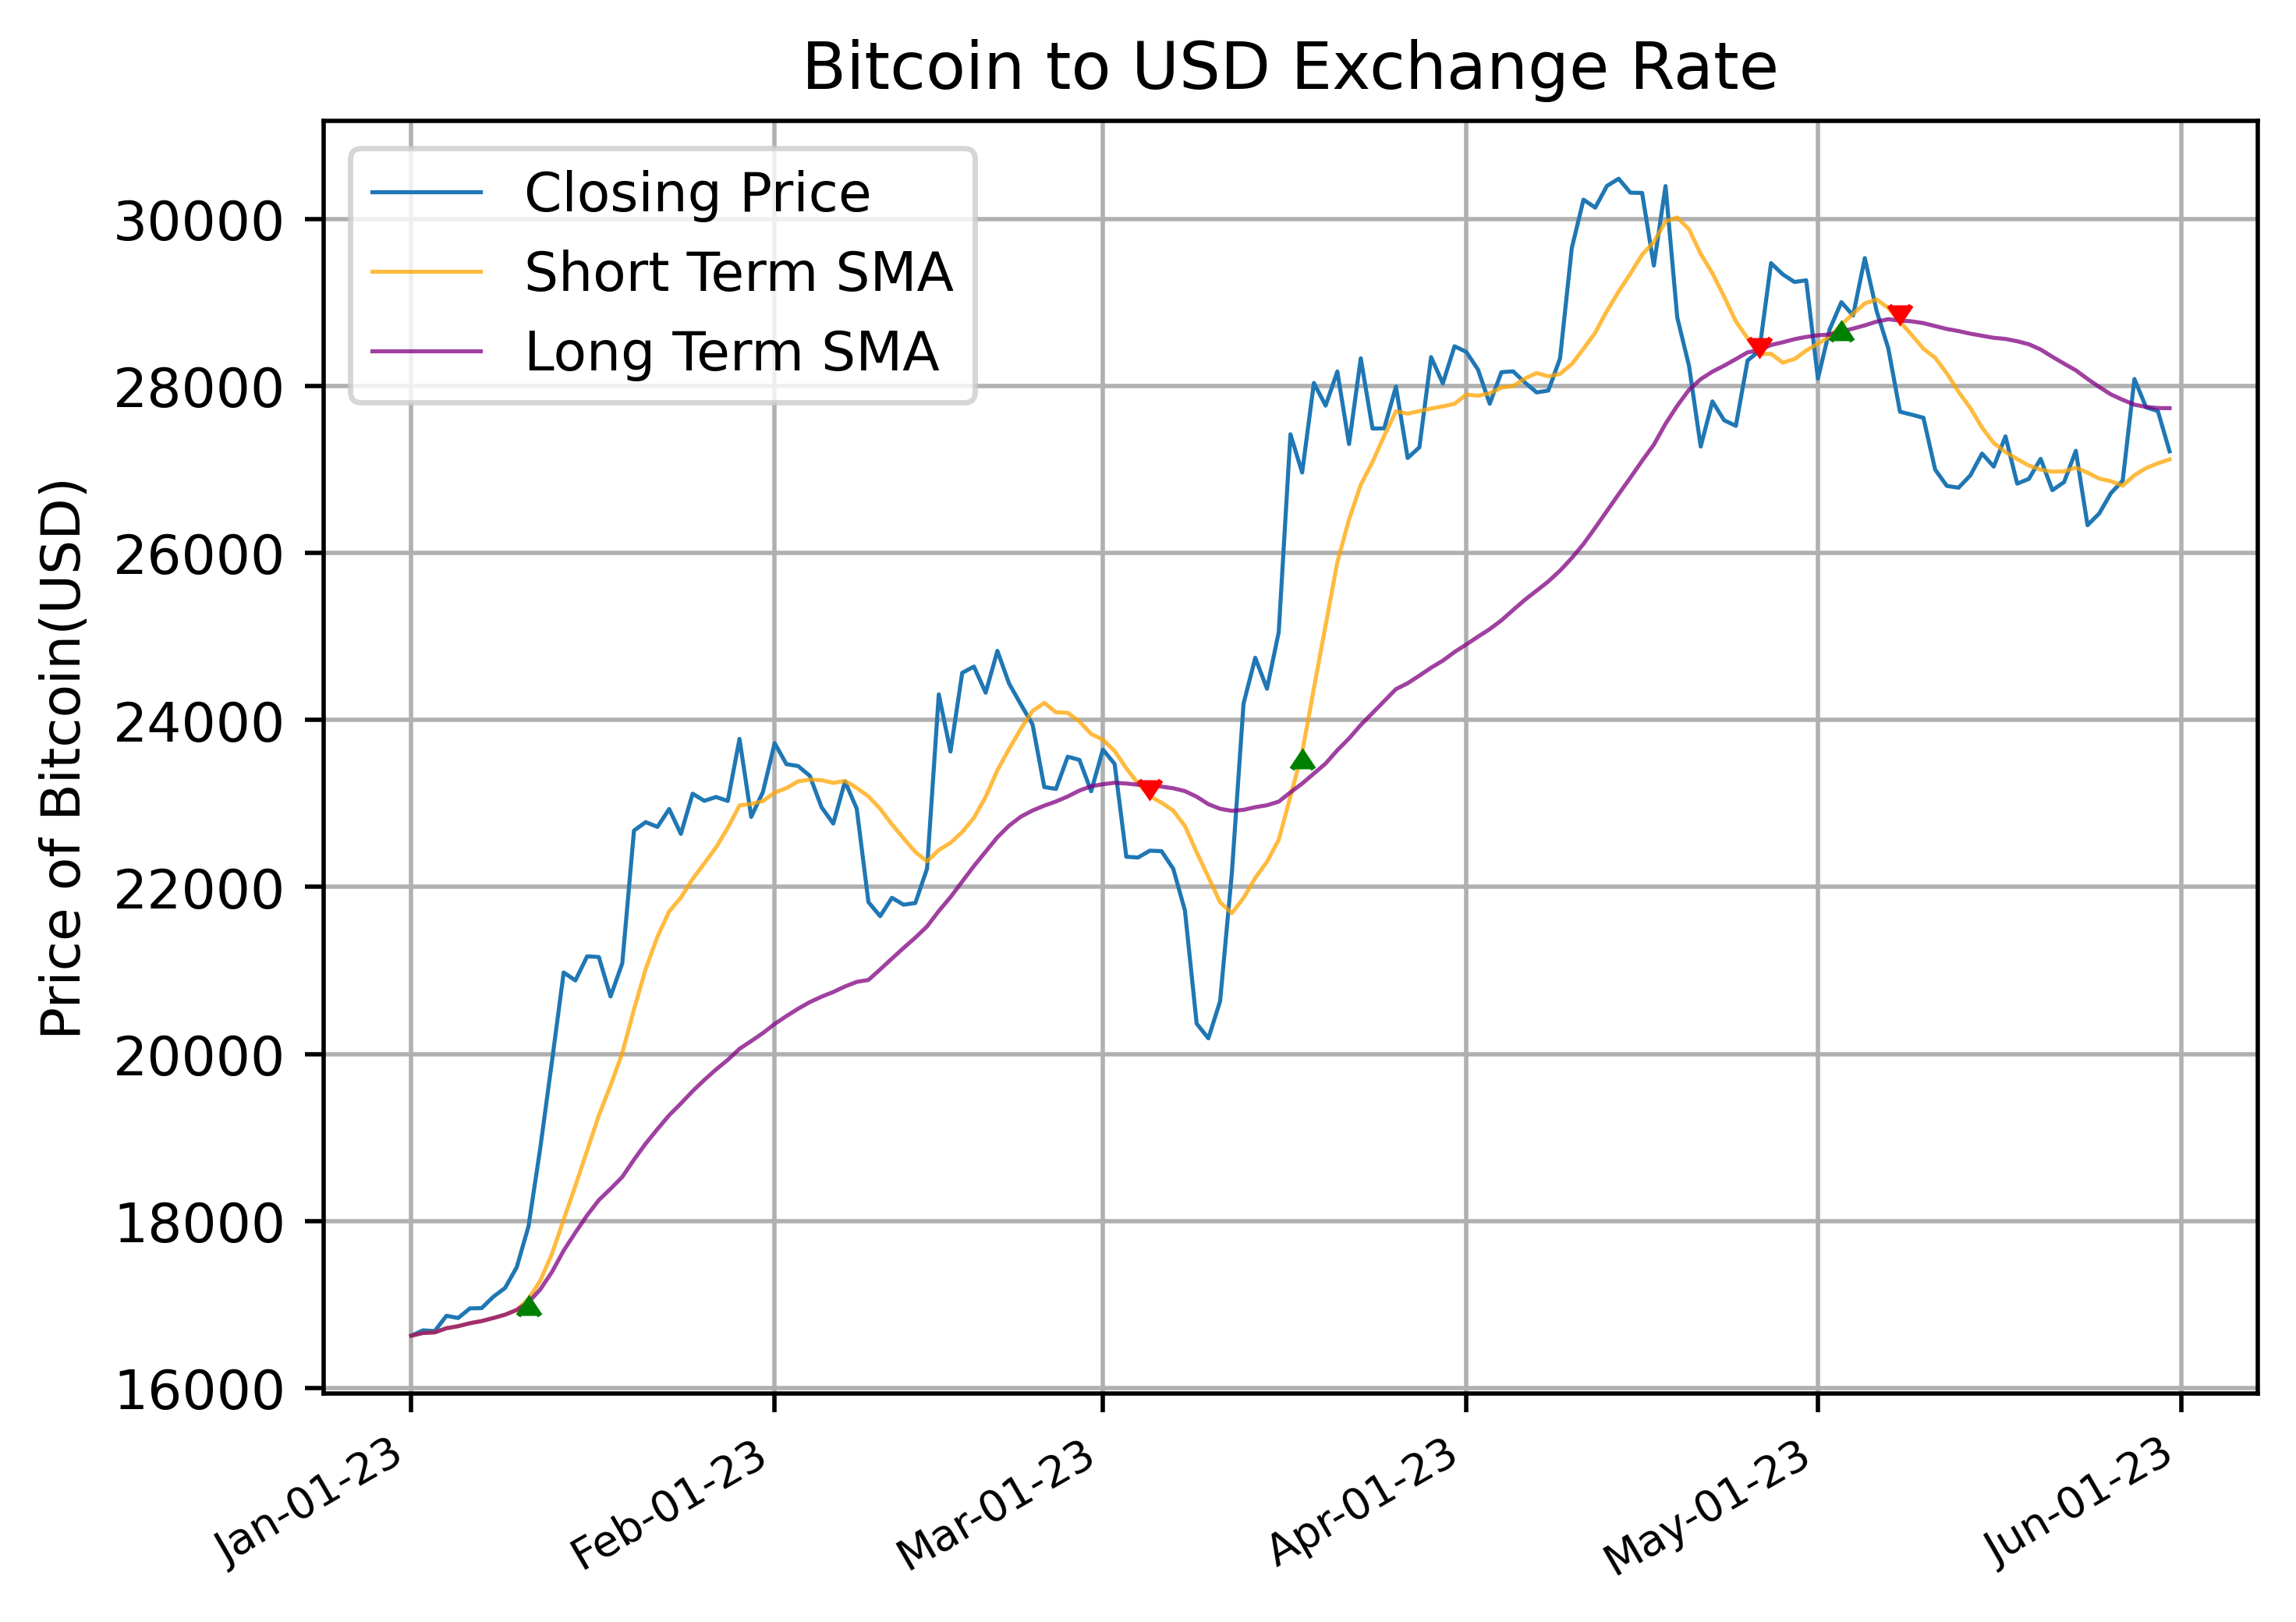

In [ ]:
fig, ax = plt.subplots(dpi=200)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short Term SMA')
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long Term SMA')

ax.plot(trade_signals.loc[trade_signals['Position'] == 1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0], marker=6, ms=4, linestyle='none', color='green')
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0], marker=7, ms=4, linestyle='none', color='red')

ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()
ax.legend()

plt.show()

In [ ]:
initial_balance = 10000.0

backtest = pd.DataFrame(index=trade_signals.index)
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1)

backtest['Alg_Return'] = np.where(trade_signals.Signal == 1,backtest.BTC_Return, 1.0)
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod()

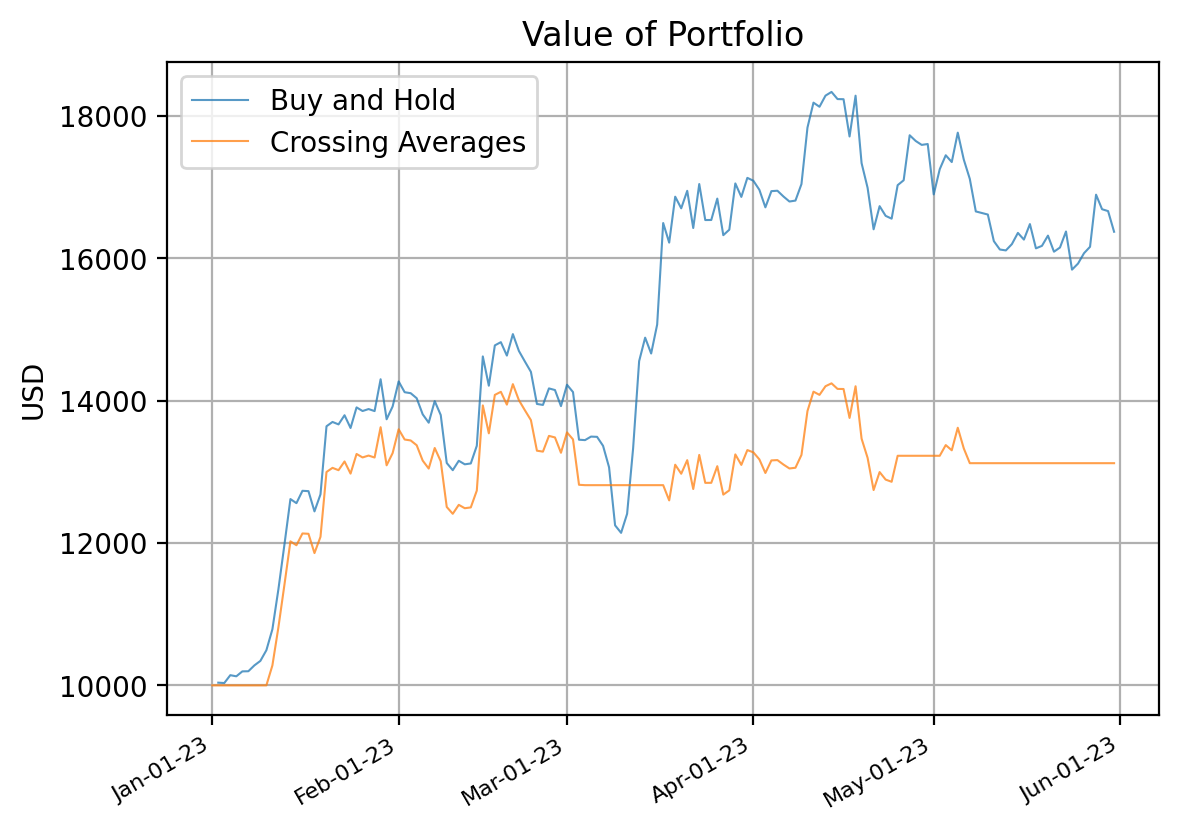

In [ ]:
fig, ax = plt.subplots(dpi=200)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid()
ax.legend()

plt.show()